# Practical - 02 Implementation of  K-NN Algorithm With Pima Dataset Classification

## Introduction To K-NN Algorithm

#### The k-Nearest Neighbors (K-NN) algorithm is a simple, non-parametric, and instance-based machine learning technique used for classification and regression tasks. It works by identifying the ‘k’ closest data points (neighbors) to a given input based on a distance metric like Euclidean distance. For classification, the input is assigned the class that is most common among its neighbors. K-NN is easy to implement, requires no training phase, and is highly effective for small datasets, though it can be computationally expensive and sensitive to irrelevant features on larger datasets.

## Algorithm of KNN

### Here’s a step-by-step guide to the K-Nearest Neighbors (K-NN) algorithm for classification problems:

### Step 1: Load the Data
- Collect the dataset that contains labeled examples (features and their corresponding class labels).

### Step 2: Choose the Value of **k**
- Decide on the number of neighbors (**k**) to consider for classification. Common values are 3, 5, or 7. 
- A smaller **k** may lead to overfitting, while a larger **k** might smooth over distinctions between classes.

### Step 3: Split the Dataset
- Split the dataset into a training set (used for prediction) and a test set (used for validation).

### Step 4: Calculate Distance
- For a new data point, calculate the distance between this point and every point in the training set using a suitable distance metric (e.g., Euclidean distance):
  
  \[
  \text{Distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
  \]

  where \(x_i\) and \(y_i\) are feature values of the test and training instances, respectively.

### Step 5: Identify Neighbors
- Sort all the distances from the smallest to the largest.
- Select the **k** nearest data points (neighbors) based on the shortest distance.

### Step 6: Voting
- For classification, each of the **k** nearest neighbors “votes” for their class.
- Count the votes for each class, and assign the class with the majority vote to the new data point.

### Step 7: Make a Prediction
- The new data point is classified based on the class with the most votes from its neighbors.

### Step 8: Evaluate the Model
- Evaluate the accuracy of the model by comparing the predicted labels with the true labels in the test set.
  
### Step 9: Optimize (Optional)
- To improve performance, you can try different distance metrics (e.g., Manhattan distance), normalize the data, or tune the value of **k**.

This process is repeated for each new data point that requires classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.iloc[:, :-1]  # All rows, all columns except the last one
y = df.iloc[:, -1]   # All rows, only the last column

In [5]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# Assuming x contains the features and y contains the labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [10]:
y_pred = knn.predict(x_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of K-NN classifier: {accuracy * 100:.2f}%")

Accuracy of K-NN classifier: 66.23%


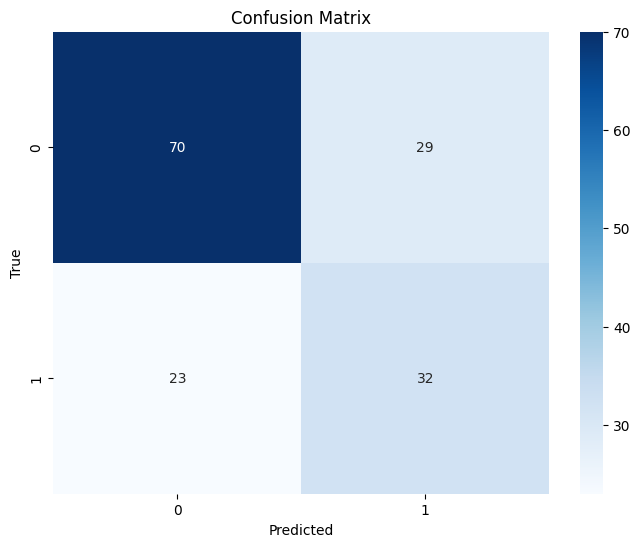

Accuracy of K-NN classifier: 66.23%


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of K-NN classifier: {accuracy * 100:.2f}%")